<a href="https://colab.research.google.com/github/Sanjai-Paxley/Data-Analytics-Internship/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Day 1**

## EDA and Handling missing data

In [ ]:
import pandas as pd
from google.colab import drive

df= pd.read_csv('cars_24_dataset.csv')

# df.head()
# df.info()
# df.drop_duplicates()
# df.describe()
# df.shape
# df.columns

print("   ")

print("Before Handling the Missing Values")
print(df.isnull().sum())

df.drop(columns=['Unnamed: 0'], inplace=True)

df['Location']= df['Location'].fillna('Unknown')

# print(df[df['Car Name'].isnull()])

df['Year'] = df['Year'].astype('Int64')

df.at[4901,'Car Name']='Suzuki'
df.at[4901,'Year']=2016

print("   ")

print("After Handling the Missing Value")
print(df.isnull().sum())

print("   ")

print("Datatypes of the Columns")
df.dtypes

FileNotFoundError: [Errno 2] No such file or directory: 'cars_24_dataset.csv'

## Aggregation Functions

### Libraries and Functions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from datetime import datetime

sns.set(style="whitegrid")

distance_stats = df.groupby('Type')['Distance'].agg(['min', 'max']).reset_index()

distance_melted = distance_stats.melt(
    id_vars='Type',
    value_vars=['min', 'max'],
    var_name='Metric',
    value_name='KM'
)

### Car Count by Fuel Type

In [ ]:
print("Car count by Fuel type")
print(df['Fuel'].value_counts())
#calculates number of Cars in the Same Fuel Type.
#Eg: PETROL 10 means there are 10 cars which uses Petrol as Fuel.

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Fuel', data=df, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha="center")

plt.title('Car Count by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.tight_layout()
plt.show()

### Average Price based on Fuel type

In [ ]:
print("Average Price based on Fuel type")
print(df.groupby('Fuel')['Price'].mean().round())
#Calculates the Average Price by Fuel Category, Based on this we can know which Fuel based cars are Cheap/Affordable.
#Eg: CNG 140200 means the average price of CNG cars is 140200.

avg_price = df.groupby('Fuel')['Price'].mean().round()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')

plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (₹)')
plt.tight_layout()
plt.show()

### Minimum and Maximum KM driven by each Car Type

In [ ]:
print("Minimum and Maximum Kilometers Driven by Each Car Type")
print(df.groupby('Type')['Distance'].agg(['max', 'min']))
#Calculates the Maximum and Minimum Driven, Based on this we can know Max and Min KM driven by Car Type.
#Eg: HatchBack 971212  1 means The Max distance driven on Hatchback cars is 971212 km and Min is 1km.

plt.figure(figsize=(10,6))
sns.scatterplot(data=distance_melted, x='Type', y='KM', hue='Metric', style='Metric', s=100)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))

plt.title('Min and Max KM Driven by Car Type')
plt.xlabel('Car Type')
plt.ylabel('KM Driven')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Number of Cars on Same Type in Same Location

In [ ]:
print("Number of cars on Same Type in same location")
df['Type_Count_By_Location'] = df.groupby(['Location', 'Type']).count()
print(df[['Location', 'Type', 'Type_Count_By_Location']].head())
#Calculates How many same type of the car in the same location, Based on this We can know which type of the car is popular in a location.
#Eg: HR-98 HatchBack 6 means In HR-98, there are 6 Hatchback Cars.

### Ranking Cars based on Price in its own Type

In [ ]:
df['Price_Rank_Within_Type'] = df.groupby('Type')['Price'].rank(method='dense',ascending=False).astype(int)

print("Ranking based Price for the Type")
print(df[['Car Name','Type','Price','Price_Rank_Within_Type']].head())
#ranks the cars in its own type based on Price, by this we can know which car is expensive in a Car Type
#Eg: Maruti S PRESSO    HatchBack    514000   407 means this car is on 407th rank in Hatchback Category based on its price (514000)

### Price Difference between Actual Price and Average Price based on Fuel Type

In [ ]:
df['Avg_Price_By_Fuel'] = df.groupby('Fuel')['Price'].transform('mean').round()
df['Price_Diff_From_Fuel_Avg'] = df['Price'] - df['Avg_Price_By_Fuel']

print("Price Difference between Actual Price and Average Price in the Fuel type")
print(df[['Type','Price','Avg_Price_By_Fuel','Price_Diff_From_Fuel_Avg']].head())
# Calculates the Difference between the Actual price of the car and the Average Price on its Fuel Type.
# with this, we can know how much higher or lower we are spending on to buy a car.
# Eg: HatchBack   514000   547910.0    -33910.0 means this Hatchback car's actual prize is 514000. Average Prize of a Hatchback car is 547910.0.
# which means we are spending 33910 less amount on this car.

avg_prices = df.groupby('Fuel')['Price'].mean().round().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_prices, x='Fuel', y='Price', palette='Set2')

plt.title('Average Car Price by Fuel Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

print("")

### Car Age

In [ ]:
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']
df['Car_Age'].replace(0, 1, inplace=True)

print("Car Age based on Year")
print(df[['Car Name','Car_Age']].head())
#Calculates the Car's Age. Based on this we can know how old the car is.
#Eg: Maruti S PRESSO    3 means this car is 3 years old.

plt.figure(figsize=(10,6))
sns.histplot(df['Car_Age'], bins=range(0, df['Car_Age'].max()+1), kde=False, color='teal')

plt.title('Distribution of Car Age')
plt.xlabel('Car Age (years)')
plt.ylabel('Number of Cars')
plt.tight_layout()
plt.show()

### Average KM Driven by the Car per year

In [ ]:
df['KM_per_Year'] = (df['Distance'] / df['Car_Age']).round(1)

print("Kilometers Driven per Year")
print(df[['Car Name','Distance','KM_per_Year']].head())
#Calculates Average Distance the car driven every year.
#Eg: Maruti S PRESSO    3878    1292.7 means this car has been driven 1292.7 KM per year.

avg_km_by_type = df.groupby('Type')['KM_per_Year'].mean().round(1).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_km_by_type, x='Type', y='KM_per_Year', palette='Blues')

plt.title('Average KM per Year by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Avg KM per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#**Day 2 - 3**

##EDA and Handling Missing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Importing Required Libraries
# Reading the Heart Disease Dataset
df = pd.read_csv('heart_disease_dataset.csv')

print("   ")

print("Before Handling the Missing Values")
print(df.isnull().sum())
# This shows how many values are missing in each column.

# Handling the Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['ExerciseAngina'] = df['ExerciseAngina'].fillna('Unknown')
df['Oldpeak'] = df['Oldpeak'].fillna(df['Oldpeak'].median())
df['ST_Slope'] = df['ST_Slope'].fillna('Unknown')
# Filled Age and Oldpeak with their median values.
# Filled ExerciseAngina and ST_Slope with 'Unknown' as they are categorical.

print("   ")

print("After Handling the Missing Values")
print(df.isnull().sum())
# Now we can see that all missing values are handled.

print("   ")

print("Datatypes of the Columns")
print(df.dtypes)
# Displays the data types of all columns after cleaning.

   
Before Handling the Missing Values
Age               64
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina    64
Oldpeak           64
ST_Slope          64
HeartDisease       0
dtype: int64
   
After Handling the Missing Values
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
   
Datatypes of the Columns
Age               float64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


##Visualization and Aggregation

### Patient count by Chest Pain Type

In [ ]:
print("Patient Count by Chest Pain Type")
print(df['ChestPainType'].value_counts())
# Calculates number of Patients with Each Chest Pain Type.
# Eg: ASY 400 means 400 patients had Asymptomatic chest pain.

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='ChestPainType', data=df, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha="center")

plt.title('Patient Count by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

### Average Heart Rate by Gender

In [ ]:
print("Average Max Heart Rate based on Sex")
print(df.groupby('Sex')['MaxHR'].mean().round())
# Calculates the Average Maximum Heart Rate by Gender.
# Eg: M 135 means average MaxHR for Males is 135 bpm.

avg_hr = df.groupby('Sex')['MaxHR'].mean().round()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_hr.index, y=avg_hr.values, palette='coolwarm')

plt.title('Average Max Heart Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average MaxHR (bpm)')
plt.tight_layout()
plt.show()

### Age Group

Patient Count by Age Group
AgeGroup
45-60    529
60+      208
30-45    176
<30        5
Name: count, dtype: int64


/tmp/ipython-input-2-295725349.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='AgeGroup', data=df, palette='pastel')


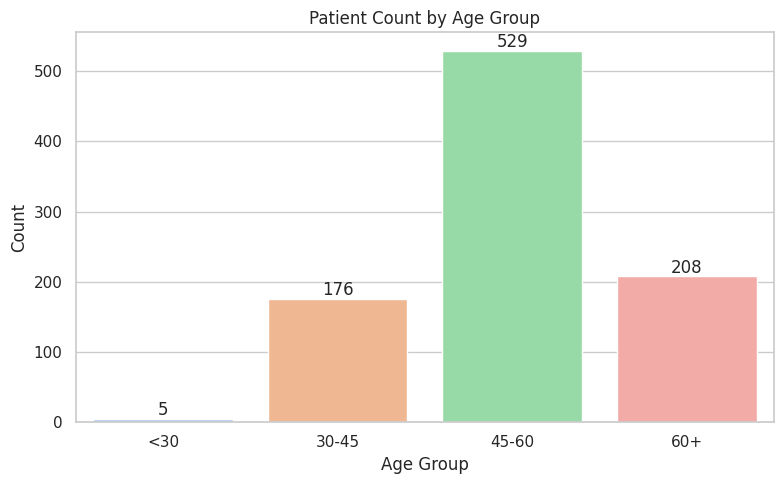

In [ ]:

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '60+'])
# Groups patients by age range for better segmentation

print("Patient Count by Age Group")
print(df['AgeGroup'].value_counts())

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='AgeGroup', data=df, palette='pastel')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 5, int(p.get_height()), ha='center')
plt.title("Patient Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Heart Risk Distribution

In [ ]:
df['HeartRisk'] = df.apply(lambda x: 'High' if x['Oldpeak'] >= 2 or x['ExerciseAngina'] == 'Y' else 'Low', axis=1)
# Custom risk factor based on angina or depression level


# Heart Risk Distribution
print("Patient Count by Heart Risk Category")
print(df['HeartRisk'].value_counts())

plt.figure(figsize=(6, 5))
sns.countplot(x='HeartRisk', data=df, palette='coolwarm')
plt.title("Heart Risk Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Pulse Pressure

Pulse Pressure Distribution


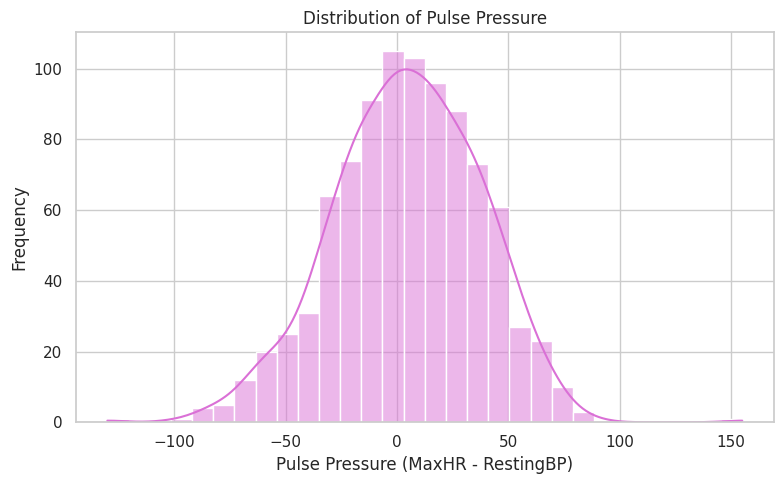

In [ ]:
df['PulsePressure'] = df['MaxHR'] - df['RestingBP']
# Shows the pressure difference between maximum heart rate and resting blood pressure

# Pulse Pressure Distribution
print("Pulse Pressure Distribution")
plt.figure(figsize=(8, 5))
sns.histplot(df['PulsePressure'], bins=30, kde=True, color='orchid')
plt.title("Distribution of Pulse Pressure")
plt.xlabel("Pulse Pressure (MaxHR - RestingBP)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### BP Categorical Distribution

Patient Count by Blood Pressure Category
BP_Category
Normal    591
High      327
Name: count, dtype: int64


/tmp/ipython-input-4-1041514722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BP_Category', data=df, palette='Set2')


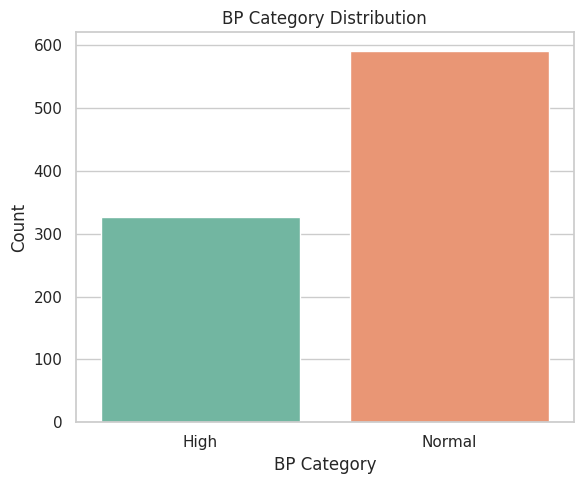

In [ ]:
df['BP_Category'] = df['RestingBP'].apply(lambda x: 'High' if x >= 140 else 'Normal')
# Categorizes BP into high or normal

# BP Category Distribution
print("Patient Count by Blood Pressure Category")
print(df['BP_Category'].value_counts())

plt.figure(figsize=(6, 5))
sns.countplot(x='BP_Category', data=df, palette='Set2')
plt.title("BP Category Distribution")
plt.xlabel("BP Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# **Day 4 - 5**

## EDA and Cleaning


### Libraries and CSV Reading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

sns.set(style="whitegrid")

# Importing Required Libraries
# Reading the E Commerce Dataset
df = pd.read_csv('E_Commerce_dataset.csv')

### Counting missing values in each column

In [ ]:
print("Number of Missing Values in  Each Column")
print(df.isnull().sum())

Number of Missing Values in  Each Column
Car Name                    0
Year                        0
Distance                    0
Owner                       0
Fuel                        0
Location                    0
Drive                       0
Type                        0
Price                       0
Price_Rank_Within_Type      0
Avg_Price_By_Fuel           0
Price_Diff_From_Fuel_Avg    0
Car_Age                     0
KM_per_Year                 0
dtype: int64


### Drop null valued rows and finding Unique values on category column

In [ ]:
df=df.dropna(subset=['Category'])

print("Unique Data in Category Column")
print(df['Category'].unique())

# Check if any missing values remain
print("Number of Missing Values in Category Column = ", df['Category'].isnull().sum())

KeyError: ['Category']

### Filling Gender based on Category Column

In [ ]:
#if the category is among ( Sports, Electronics, Toys, Automotive) then gender is filled as Male
#if the category is among ( Clothing, Beauty, Books, Home) then gender is filled as Female

female_category=['Beauty', 'Clothing', 'Books','Home']
male_category=['Sports', 'Electronics', 'Toys', 'Automotive']

def fill_gender(row):
    if row['Category'] in female_category:
        return 'Female'
    elif row['Category'] in male_category:
        return 'Male'
    else:
        return row['Gender']

df['Gender'] = df.apply(fill_gender, axis=1)

# Check if any missing values remain
print("Number of Missing Values in Gender Column = ", df['Gender'].isnull().sum())

KeyError: 'Category'

### Filling age based on Gender and Category Columns.

In [ ]:
# calculates average age for each Category-Gender group
average_age = df.groupby(['Category', 'Gender'])['Age'].mean()

# Filling missing ages with the average from the appropriate group
def fill_age(row):
    if pd.isnull(row['Age']):
        key = (row['Category'], row['Gender'])
        return round(average_age[key])
    else:
        return round(row['Age'])

df['Age'] = df.apply(fill_age, axis=1)

# Convert to integer type explicitly
df['Age'] = df['Age'].astype(int)

# Check if any missing values remain
print("Number of Missing Values in Age Column = ", df['Age'].isnull().sum())

KeyError: 'Category'

### Dropping Null valued rows in Location and Quantity Column column

In [ ]:
#dropping null valued rows on Quanity and Location column
df= df.dropna(subset=['Location'])
df=df.dropna(subset=['Quantity'])

#to check if any null values there
print("Number of Missing Values in Location Column = ",df['Location'].isnull().sum())
print("Number of Missing Values in Quantity Column = ",df['Quantity'].isnull().sum())


KeyError: ['Quantity']

### Filling Payment_Method column based on Age Group, Gender and Category

In [ ]:
print("Unique Data in Payment_Method Column")
print(df['Payment_Method'].unique())

#Bucketing the Customer's Age
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Mid Age', 'Senior', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

#For each combination of Category + Gender + AgeGroup, what is the most common payment method.
grouped_payment = df.dropna(subset=['Payment_Method']).groupby(['Category', 'Gender', 'AgeGroup'], observed=True)['Payment_Method'].agg(lambda x: x.mode().iloc[0])

#filling the quantity based by the above group
def fill_payment(row):
    if pd.isnull(row['Payment_Method']):
        key = (row['Category'], row['Gender'], row['AgeGroup'])
        return grouped_payment.get(key, df['Payment_Method'].mode()[0])
    return row['Payment_Method']

df['Payment_Method'] = df.apply(fill_payment, axis=1)

print("")

#to check if any null values there
print("Number of Missing Values in Payment_Method Column = ",df['Payment_Method'].isnull().sum())

Unique Data in Payment_Method Column
['UPI' 'PayPal' 'Cash on Delivery' 'Debit Card' 'Credit Card' nan]

Number of Missing Values in Payment_Method Column =  0


### Filling Delivery_Time_Days based on Location and Category

In [ ]:
#Calculate average Delivery_Time_Days for each (Category, Location)
delivery_time_map = (df.dropna(subset=['Delivery_Time_Days']).groupby(['Category', 'Location'])['Delivery_Time_Days'].mean())

#filling the missing values based on the above average
def fill_delivery_time(row):
    if pd.isnull(row['Delivery_Time_Days']):
        key = (row['Category'], row['Location'])
        value = delivery_time_map.get(key, df['Delivery_Time_Days'].mean())
        return round(value)
    else:
        return round(row['Delivery_Time_Days'])

df['Delivery_Time_Days'] = df.apply(fill_delivery_time, axis=1)

#to check if any null values there
print("Number of Missing Values in Delivery_Time_Days Column = ",df['Delivery_Time_Days'].isnull().sum())

Number of Missing Values in Delivery_Time_Days Column =  0


### Filling Is_Returned Column based on Gender, Age and Category

In [ ]:
# Calculate average return rate for each group which has category, gender and agegroup
return_rate_map = (df.dropna(subset=['Is_Returned']).groupby(['Category', 'Gender', 'AgeGroup'], observed=True)['Is_Returned'].mean())

#filling the missing values based on the above average
def fill_is_returned(row):
    if pd.isnull(row['Is_Returned']):
        key = (row['Category'], row['Gender'], row['AgeGroup'])
        value = return_rate_map.get(key, df['Is_Returned'].mean())
        return round(value)
    return row['Is_Returned']

df['Is_Returned'] = df.apply(fill_is_returned, axis=1)

#to check if any null values there
print("Number of Missing Values in Is_Returned Column = ",df['Is_Returned'].isnull().sum())

Number of Missing Values in Is_Returned Column =  0


### Filling Total_Amount based on Median

In [ ]:
#fills the null with median value
df['Total_Amount'].fillna(df['Total_Amount'].median(), inplace=False)

#to check if any null values there
print("Number of Missing Values in Total_Amount Column = ",df['Total_Amount'].isnull().sum())

Number of Missing Values in Total_Amount Column =  125


### To Check if there any null value

In [ ]:
print("Number of Missing Values in  Each Column")
print(df.isnull().sum())

Number of Missing Values in  Each Column
Order_ID                0
User_ID                 0
Gender                  0
Age                     0
Location                0
Product_ID              0
Category                0
Price                   0
Quantity                0
Discount                0
Payment_Method          0
Order_Date              0
Delivery_Time_Days      0
Is_Returned             0
Total_Amount          125
AgeGroup                0
dtype: int64


##Visualization

### Purchase Frequency based on Location

Location
Ahmedabad    544
Hyderabad    536
Bangalore    534
Delhi        525
Mumbai       513
Chennai      511
Pune         510
Kolkata      487
Name: count, dtype: int64


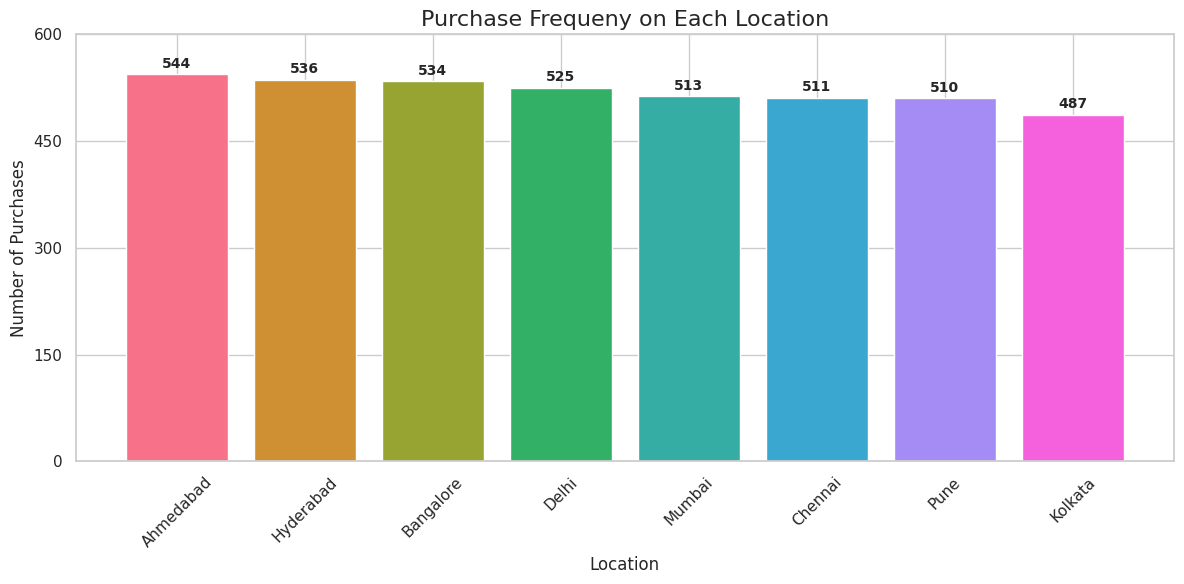

In [ ]:
#shows number products ordered in each location.
location_counts = df['Location'].value_counts()
print(location_counts)
colors = sns.color_palette("husl", len(location_counts))

plt.figure(figsize=(12, 6))
bars = plt.bar(location_counts.index, location_counts.values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,height + 5,f'{int(height)}',ha='center',va='bottom',fontsize=10,fontweight='bold')

plt.title("Purchase Frequeny on Each Location", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)

plt.xticks(rotation=45)
plt.yticks(range(0, int(location_counts.max()) + 150, 150))

plt.tight_layout()
plt.show()

### Purchase Count based on Gender and Category

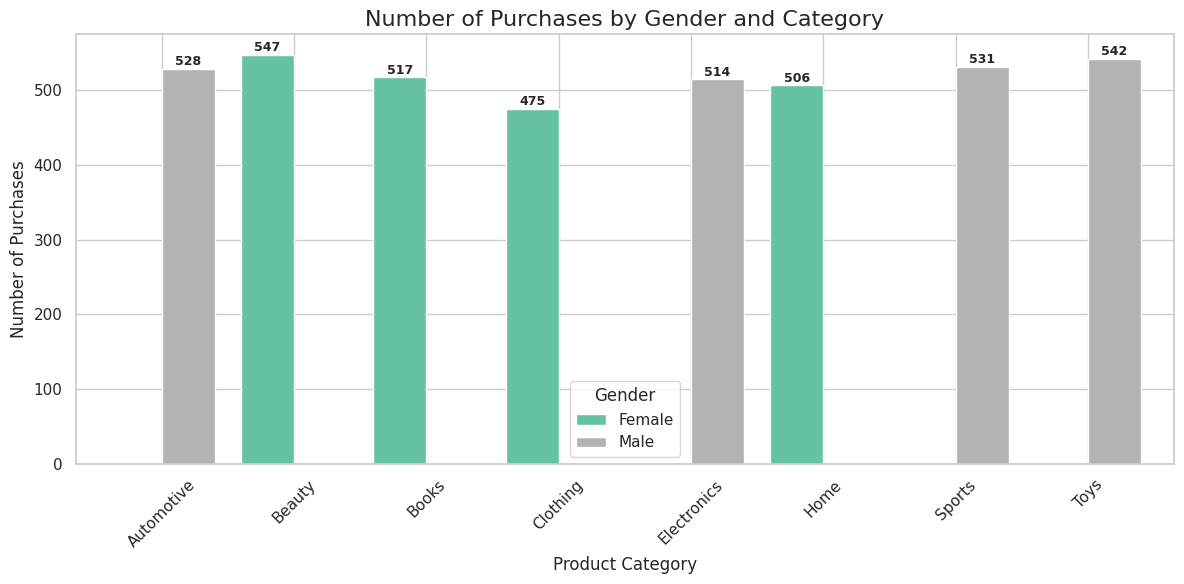

In [ ]:
#shows number of purchase on each category based on gender
category_gender_counts = df.groupby(['Category', 'Gender']).size().unstack(fill_value=0)

sns.set(style="whitegrid")
ax = category_gender_counts.plot(kind='bar',figsize=(12, 6),colormap='Set2',width=0.8)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(x=p.get_x() + p.get_width() / 2,y=height + 1,s=f'{int(height)}',ha='center',va='bottom',fontsize=9,fontweight='bold')

plt.title("Number of Purchases by Gender and Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### Top 3 Locations by Purchase Count in Each Category

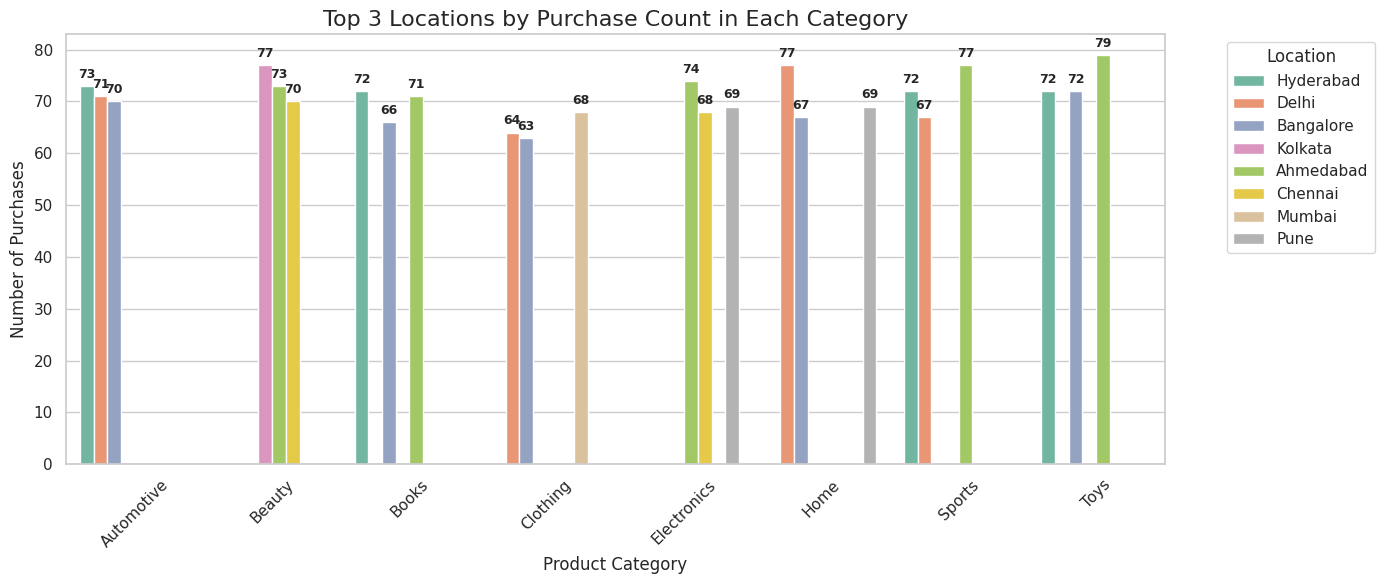

In [ ]:
#shows top 3 location on each category by the product ordered frequency
category_location_counts = df.groupby(['Category', 'Location']).size().reset_index(name='Purchase_Count')

top3_per_category = category_location_counts.sort_values(['Category', 'Purchase_Count'], ascending=[True, False])
top3_per_category = top3_per_category.groupby('Category').head(3)

plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(data=top3_per_category,x='Category',y='Purchase_Count',hue='Location',palette='Set2')

for bar in bar_plot.patches:
    height = bar.get_height()
    if height > 0:
        bar_plot.text(x=bar.get_x() + bar.get_width() / 2,y=height + 1,s=f'{int(height)}',ha='center',va='bottom',fontsize=9,fontweight='bold')

plt.title("Top 3 Locations by Purchase Count in Each Category", fontsize=16)
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### New Column - Final Product Cost

In [ ]:
# by quantity and price we can know total price of the product, then subtract discount for final price
df['Final_Amount'] = ((df['Price']*df['Quantity'])-(1-df['Discount']/100))

### New Column - Customer Type

In [ ]:
#This bins the customer based on age group
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Mid Age', 'Senior', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

df['Customer_Type'] = df['Gender'] + ' - ' + df['AgeGroup'].astype(str)

### New Column - Purchase Season

In [ ]:
#creating a column to know in which season this order was taken place
df['Purchase_Month'] = pd.to_datetime(df['Order_Date']).dt.month_name()
df['Purchase_Weekday'] = pd.to_datetime(df['Order_Date']).dt.day_name()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Purchase_Season'] = pd.to_datetime(df['Order_Date']).dt.month.apply(get_season)

### Most Purchased Category in Season

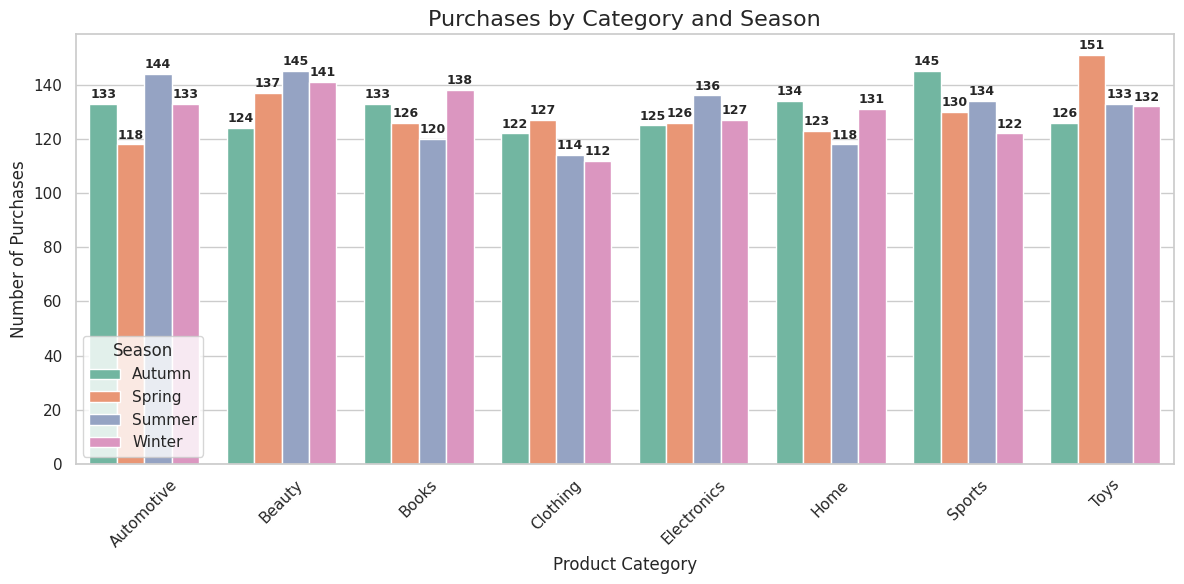

In [ ]:
#by this we can  know which type category product was popular in a season
category_season_counts = df.groupby(['Category', 'Purchase_Season']).size().reset_index(name='Purchase_Count')

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

barplot = sns.barplot(data=category_season_counts,x='Category',y='Purchase_Count',hue='Purchase_Season',palette='Set2')

for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        barplot.text(x=bar.get_x() + bar.get_width() / 2,y=height + 1,s=f'{int(height)}',ha='center',va='bottom',fontsize=9,fontweight='bold')

plt.title("Purchases by Category and Season", fontsize=16)
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Relation Analysis

### Gender vs Category

### Correlation Matrix - Numericals.

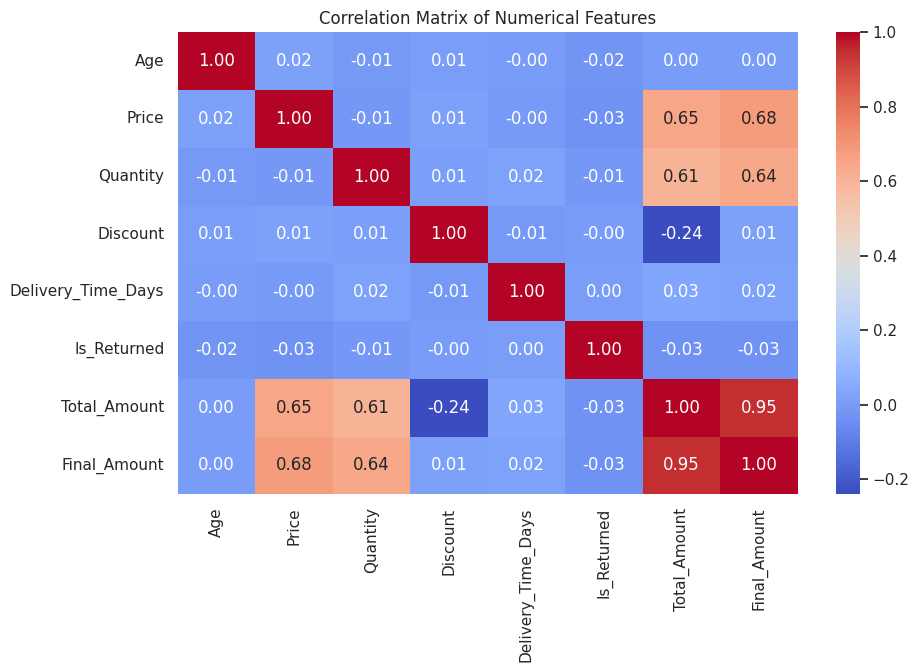

In [ ]:
numeric = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

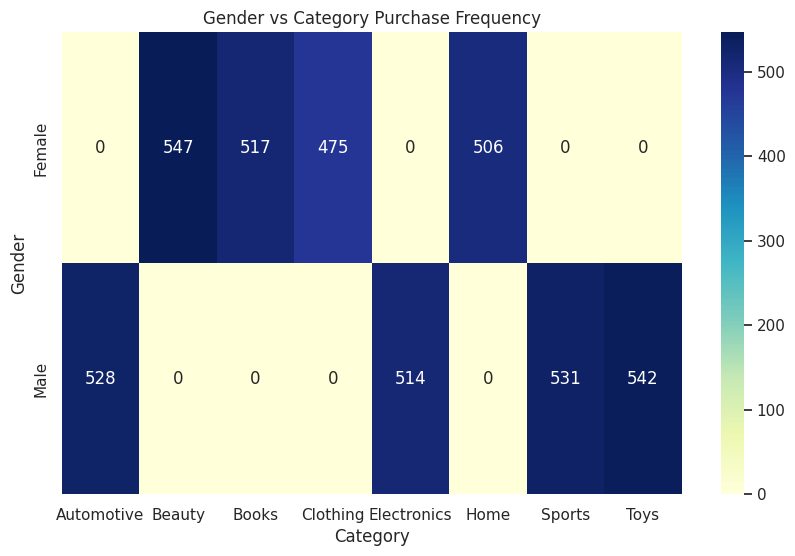

In [ ]:
#with this we can know which gender people buys what kind of products and its counts
cross = pd.crosstab(df['Gender'], df['Category'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Gender vs Category Purchase Frequency")
plt.xlabel("Category")
plt.ylabel("Gender")
plt.show()

### Gender vs Is_Returned

['Female' 'Male']


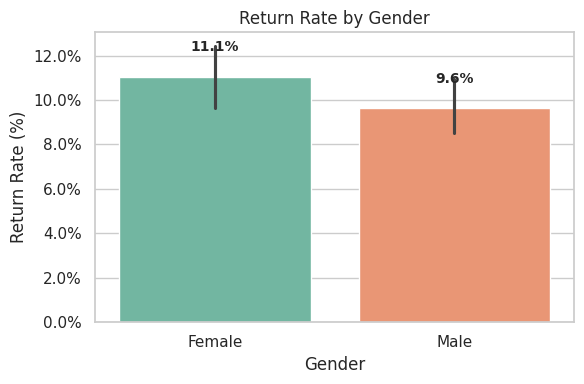

In [ ]:
#to know about which gender people returns the product most.
plt.figure(figsize=(6, 4))

ax = sns.barplot(data=df, x='Gender', y='Is_Returned', hue= 'Gender',palette='Set2')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,height + 0.01,f"{height*100:.1f}%",ha='center',va='bottom',fontsize=10,fontweight='bold')

ax.yaxis.set_major_formatter(PercentFormatter(1))

plt.title("Return Rate by Gender")
plt.ylabel("Return Rate (%)")
plt.tight_layout()
plt.show()

### Category vs Total_Amount

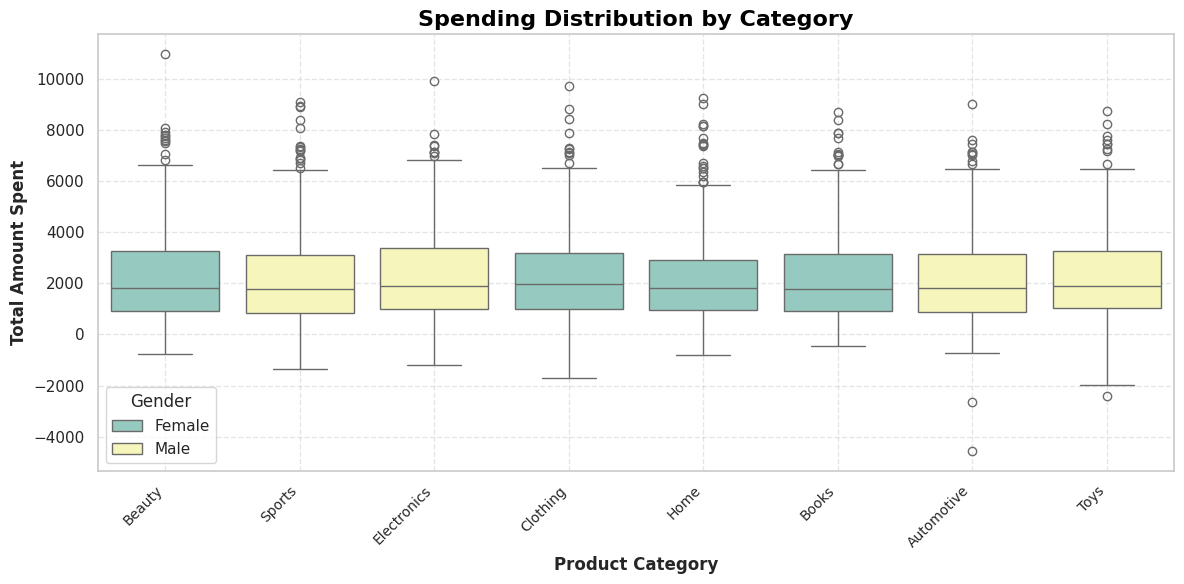

In [ ]:
sns.set(style="whitegrid", palette="Set3")
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Category', y='Total_Amount', hue='Gender', palette='Set3')

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.title("Spending Distribution by Category", fontsize=16, fontweight='bold', color='Black')
plt.xlabel("Product Category", fontsize=12, fontweight='bold')
plt.ylabel("Total Amount Spent", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#**Day 7**

#**Day 8**

### Importing Dataset and libraries

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/content/drive/My Drive/Internship on Data Analytics July-Aug 2025/Datasets/mushrooms.csv')

sns.set(style="whitegrid", palette="Set2")

##Visualization

### Population vs Habitat

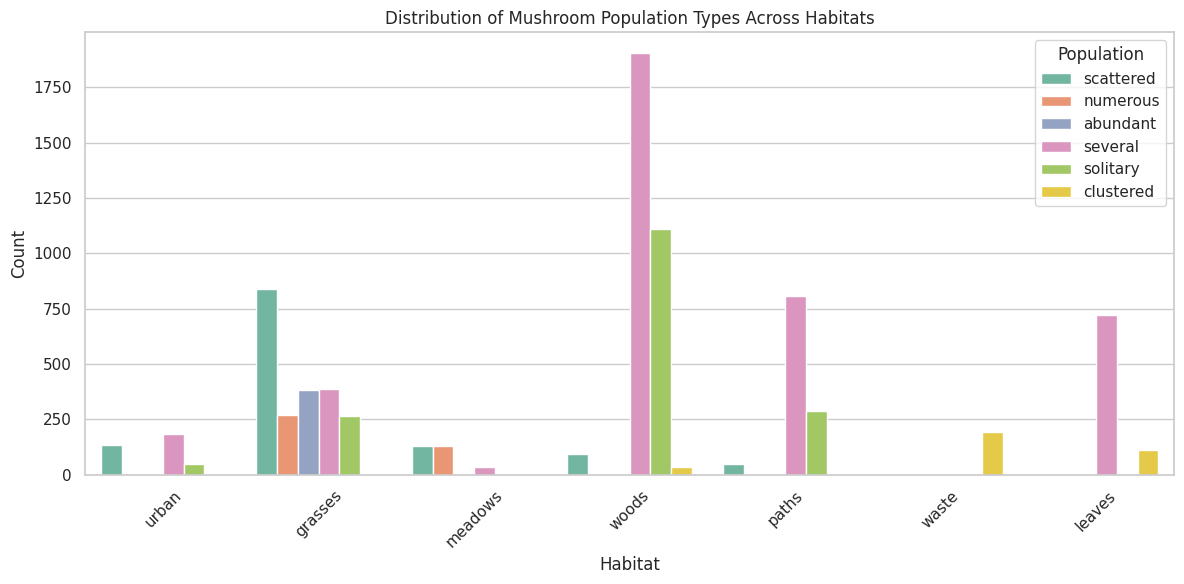

In [ ]:
plt.figure(figsize=(12, 6))
pop_habitat_plot = sns.countplot(data=df, x='habitat', hue='population')
plt.title('Distribution of Mushroom Population Types Across Habitats')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Population')
plt.tight_layout()
plt.show()

### Odor vs Cap Color

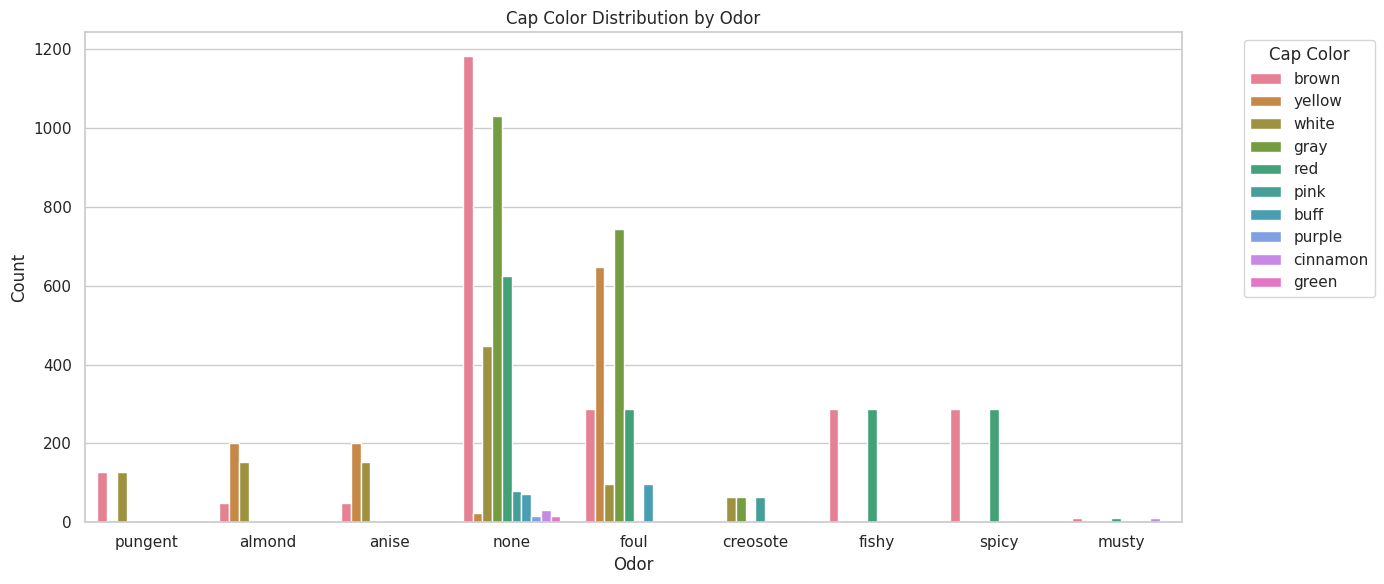

In [ ]:
plt.figure(figsize=(14, 6))
odor_color_plot = sns.countplot(data=df, x='odor', hue='cap_color')
plt.title('Cap Color Distribution by Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.legend(title='Cap Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Odor vs Class

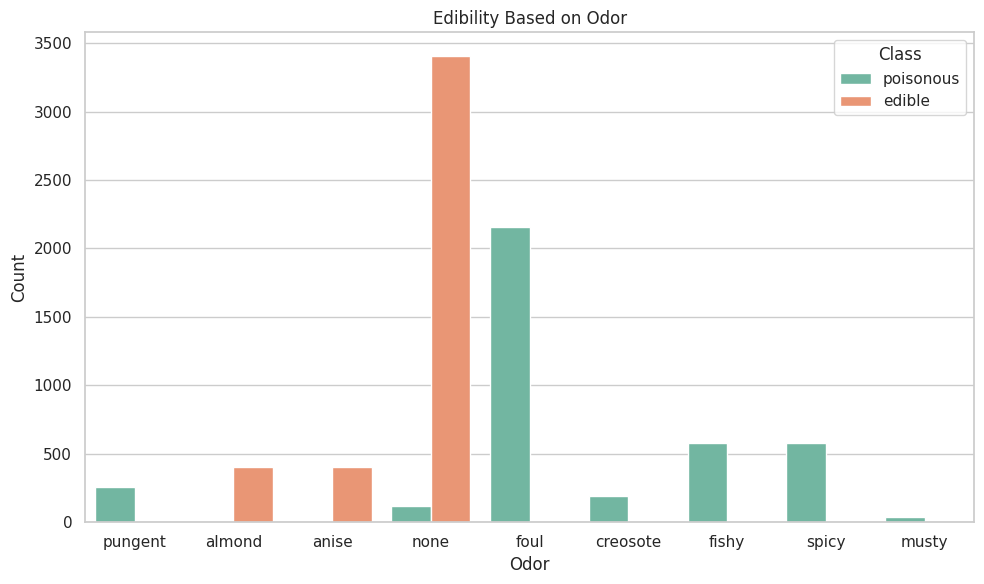

In [ ]:
plt.figure(figsize=(10, 6))
bruises_odor_class = sns.countplot(data=df, x='odor', hue='class')
plt.title('Edibility Based on Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.legend(title='Class')
plt.tight_layout()
plt.show()